In [0]:
# carregando o dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_%20train.csv' 
titanic = pd.read_csv(url)

# mudado a ordem das colunas para que o y seja a ultima coluna 
titanic = titanic[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]

# definindo id do passageiro como índice 

In [81]:
# verificando o tipo dos dados
titanic.dtypes

# muito dados faltantes em várias linhas 
# dropna talvez deixe o modelo muito pobre em dados de treino
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
# lidando com os dados faltantes na coluna escolhida
for column in titanic.columns:
    if titanic[column].dtype != 'object':
        titanic[column].fillna(titanic[column].mean(), inplace= True)
    else:
        titanic[column] = titanic[column].astype('str')
        titanic[column].fillna(titanic[column].mode(), inplace= True)
        

In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
## preparando os dados para os modelos
#definindo as colunas a serem usadas no modelo
colunas = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Survived']

# colunas para teste
colunas2 = colunas.copy()
colunas2.remove('Survived')

# separando o dataset em variáveis independentes e dependentes
titanic_x = titanic.copy()[colunas].drop('Survived', axis= 1)
titanic_y = titanic.copy()[colunas]['Survived']

# codificando as variaveis categoricas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in titanic_x.columns:
    if titanic_x[column].dtype == 'object':
        titanic_x[column] = le.fit_transform(titanic_x[column])

In [85]:
## ajuste e avaliaçào do modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# chamando o classificador 
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# perfomando o cross validation no dataset segundo do classificador
cv_score = cross_val_score(clf, titanic_x, titanic_y, cv= 10, scoring= 'accuracy')

#avaliando os resultados
print('Mean accuracy cv \n', cv_score.mean())


Mean accuracy cv 
 0.7947400976052662


In [86]:
## treinamento do modelo
# ajustando o modelo
from sklearn.model_selection import train_test_split

# dividindo os dados em treino e teste para fazer a avaliação mais acurada de outras métricas
x_treino, x_teste, y_treino, y_teste = train_test_split(titanic_x, titanic_y, test_size= 0.20, random_state= 55)

# ajustando o modelo preditivo aos dados de treino
clf.fit(x_treino, y_treino)

# prevendo as saídas nos dados de teste
resultado = clf.predict(x_teste)

# avaliaçào dos resultados
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

print('Confusion matrix \n', confusion_matrix(resultado, y_teste), '\n',
     'Accuracy score \n', accuracy_score(resultado, y_teste), '\n', 
     'Recall score \n', recall_score(resultado, y_teste), '\n',
     'Precision score \n', precision_score(resultado, y_teste), '\n',
     'f1 score \n', f1_score(resultado, y_teste))



Confusion matrix 
 [[97 29]
 [13 40]] 
 Accuracy score 
 0.7653631284916201 
 Recall score 
 0.7547169811320755 
 Precision score 
 0.5797101449275363 
 f1 score 
 0.6557377049180327


In [0]:
url_teste = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_test.csv'
teste = pd.read_csv(url_teste)

In [88]:
# teste para rodar o modelo
teste = teste[colunas2]
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [0]:
# lidando com os valores faltantes
for column in teste.columns:
    if teste[column].dtype != 'object':
        teste[column].fillna(teste[column].mean(), inplace= True)
    else:
        teste[column] = teste[column].astype('str')
        teste[column].fillna(teste[column].mode(), inplace= True)
        

In [0]:
# reaplicado a tranformação do label encoder
le = LabelEncoder()
for column in teste.columns:
    if teste[column].dtype == 'object':
        teste[column] = le.fit_transform(teste[column])

In [0]:
# resuldado da primeira previsão
resultado = clf.predict(teste)

In [92]:
"""
## montado o dataset resposta para ser enviado
# subido o template
df = pd.read_csv(url_teste)
envio = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': resultado})

# salvando um csv
nome_arquivo = 'titanic_submission_1.csv'
envio.to_csv(nome_arquivo, index= False)

#Fim
"""

"\n## montado o dataset resposta para ser enviado\n# subido o template\ndf = pd.read_csv(url_teste)\nenvio = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': resultado})\n\n# salvando um csv\nnome_arquivo = 'titanic_submission_1.csv'\nenvio.to_csv(nome_arquivo, index= False)\n\n#Fim\n"

### Second Model

In [0]:
## ajuste de um segundo modelo de privisão
## segundo classificador 

In [0]:
titanic2 = titanic.copy()
x2 = titanic_x.copy()
y2 = titanic_y.copy()

In [0]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


y2_axis = []
x2_axis = []

it = 7

for m in(range(it)):

  error_ = 0
  n = 5
  
  for i in(range(n)):
    # chamando o modelo
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

    x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2, y2, test_size= 0.25, random_state= i**2)

    # ajustando um modelo
    clf.fit(x2_treino, y2_treino)

    # fazendo a previsao
    prev2 = clf.predict(x2_teste)


    # avaliando o erro
    from sklearn.metrics import mean_squared_log_error
    import numpy as np


    error = accuracy_score(prev, y2_teste)
    error_ += error

  y2_axis.append(error_/n)
  x2_axis.append(m)

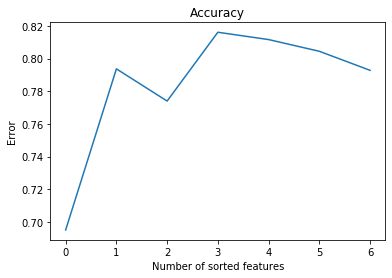

In [98]:
import matplotlib.pyplot as plt


plt.plot(x2_axis, y2_axis)
plt.title('Accuracy')
plt.xlabel('Number of sorted features')
plt.ylabel('Error')
plt.show()

In [99]:
accuracy_df = pd.DataFrame({'n of features': x2_axis,
                         'accuracy': y2_axis}).sort_values(by= ['accuracy'], ascending= False)

accuracy_df.head()

,n of features,accuracy
3,3,0.816143
4,4,0.811659
5,5,0.804484
1,1,0.793722
6,6,0.792825


In [0]:
# feature importances
feature_importance = pd.Series(clf2.feature_importances_, index= x2_treino.columns).sort_values(ascending= False)
feature_importance

In [100]:
# list
limit = list(accuracy_df['n of features'])[0]
feature_importance.index[0: limit]

Index(['Fare', 'Sex', 'Age'], dtype='object')

In [101]:
colunas2 = feature_importance.index[0: limit]

url_teste = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_test.csv'
teste2 = pd.read_csv(url_teste)

# lidando com os dados faltantes na coluna escolhida
for column in teste2.columns:
    if teste2[column].dtype != 'object':
        teste2[column].fillna(teste2[column].mean(), inplace= True)
    else:
        teste2[column] = teste2[column].astype('str')
        teste2[column].fillna(teste2[column].mode(), inplace= True)
        

# teste para rodar o modelo
teste2 = teste3[colunas2]
teste2.info()

for column in teste3.columns:
    if teste2[column].dtype == 'object':
        teste2[column] = le.fit_transform(teste2[column])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
Fare    418 non-null float64
Sex     418 non-null int64
Age     418 non-null float64
dtypes: float64(2), int64(1)
memory usage: 9.9 KB


In [0]:
clf.fit(x2[colunas2], y2)

y_pred2 = clf.predict(teste2)

## montado o dataset resposta para ser enviado
# subido o template
df2 = pd.read_csv(url_teste)
envio = pd.DataFrame({'PassengerId': df2['PassengerId'], 'Survived': y_pred2})

In [0]:
# salvando um csv

#path = r'C:\Users\Avell\Desktop\Python\github\datasets'
#nome = '\titanic_submission_2.csv'
#envio.to_csv(path+nome, index= False)

In [0]:
titanic['n_family'] = titanic['Parch'] + titanic['SibSp']

In [0]:
titanic_survived = titanic.loc[titanic['Survived'] == 1].drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis= 1)
titanic_died = titanic.loc[titanic['Survived'] == 0].drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis= 1)

In [106]:
titanic_survived['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [107]:
titanic_died['Pclass'].value_counts().sort_index()

1     80
2     97
3    372
Name: Pclass, dtype: int64

## Third Model

Fourth Model

In [0]:
titanic4 = titanic.copy()
x4 = titanic_x.copy()
y4 = titanic_y.copy()

In [109]:
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

error_ = []
n = 20
  
for i in(range(n)):
  # chamando o modelo
  clf4 = XGBClassifier()

  x4_treino, x4_teste, y4_treino, y4_teste = train_test_split(x4, y4, test_size= 0.25, random_state= i**2)

  # ajustando um modelo
  clf4.fit(x4_treino, y4_treino)

  # fazendo a previsao
  prev4 = clf4.predict(x4_teste)


  # avaliando o erro
  from sklearn.metrics import mean_squared_log_error
  import numpy as np


  error = accuracy_score(prev4, y4_teste)
  error_.append(error)
  error_s = pd.Series(error_)

error_s.min()

0.757847533632287

In [110]:
teste4 = teste.copy()
teste4

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [0]:
y_pred4 = clf4.predict(teste4)

df4 = pd.read_csv(url_teste)
envio = pd.DataFrame({'PassengerId': df4['PassengerId'], 'Survived': y_pred4})

In [0]:
# salvando um csv

path = r'C:\Users\Avell\Desktop\Python\github\datasets'
nome = '\titanic_submission_2.csv'
envio.to_csv(path+nome, index= False)

## References

Como selecionar as melhores features para seu modelo de Machine Learning

https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a